# Name : *Mariam Bebawy*  
## Track : *Data Science & Business Analytics*  

### Task 2 : *Prediction Using Unsupervised ML*  
predict the number of clusters and represent it visually

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [6]:
from sklearn import datasets

In [10]:
data = datasets.load_iris()
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [12]:
data_df = pd.DataFrame(data.data, columns=[data.feature_names])
data_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
data_df['target'] = data.target
data_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
# Split the data into training and testing (30% testing)
X = data_df[data_df.columns[:-1]]
y = data_df[data_df.columns[-1:]]

X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.7, test_size = 0.3, random_state = 0 )

In [19]:
XValues = X.values
yValues = y.values

In [20]:
from sklearn.cluster import KMeans

In [21]:
squared_distances = []
neighbours = range(1,12)

for i in neighbours:
    clf = KMeans(n_clusters=i, random_state=0)
    clf.fit(XValues)
    squared_distances.append(clf.inertia_)

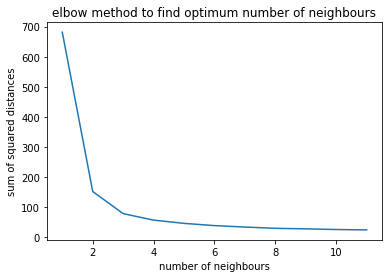

In [22]:
plt.plot(neighbours, squared_distances)
plt.xlabel('number of neighbours')
plt.ylabel('sum of squared distances')
plt.title('elbow method to find optimum number of neighbours')
plt.show()

In [23]:
print('opitmum number is at 3 neighbours, where the relation almost becomes linear')

opitmum number is at 3 neighbours, where the relation almost becomes linear


In [25]:
clf = KMeans(n_clusters=3, random_state=0)
clf = clf.fit(XValues)
y_pred = clf.predict(XValues)

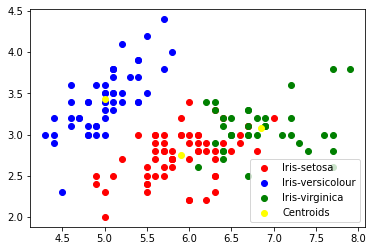

In [31]:
plt.scatter(XValues[y_pred==0,0], XValues[y_pred==0,1], c='red', label='Iris-setosa')
plt.scatter(XValues[y_pred==1,0], XValues[y_pred==1,1], c='blue', label='Iris-versicolour')
plt.scatter(XValues[y_pred==2,0], XValues[y_pred==2,1], c='green', label='Iris-virginica')

centerX = clf.cluster_centers_[:,0]
centerY = clf.cluster_centers_[:,1]
plt.scatter(centerX, centerY, c='yellow', label='Centroids')

plt.legend()